In [1]:
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas

You should consider upgrading via the 'd:\jojo\stuff\notebooks\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'd:\jojo\stuff\notebooks\scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In linear regression, we are creating a linear function to calculate value $f(x)$ for a given $x$.  To find $f(x)$, we are given sample values of $x$ and $y$.  We want our $f(x)$ to be very close to $y$ for every value of $x$.  The hope is that for any other values of $x$ not in the sample, $f(x)$ would predict the correct value of $y$.

The equation is just like any linear equation, in the form of

$$
f(x) = mx + b
$$

But in linear-regression-speak, we write

$$
h_\theta(x) = \theta_0 + \theta_1x
$$

(this is not complete as we will see later, but it is easier to understand for now)

The steps of linear regression are

1. Pick some $\theta_{0}$ and $\theta_{1}$
2. Calculate $h_{\theta}(x)$ for every given sample of $x$
3. Compare the calculated value with the actual value.  Calculate the overall error level (known as cost function $J$)
   by using
   $$
     \frac12\sum_{i=1}^m(h_\theta(x)^{(i)} - y^{(i)})^2
   $$
   where    
   - $m$ is the number of training samples
   - $y$ is the actual value of training sample for a given $x$
   - $i$ is the index of the training sample
   - $x^{(i)}$ is the $x$ of the the training sample of index $i$
   - $j$ is the index of the input variable
   - $n$ is the number of input variabls per training sample
4. Minimize the cost function $J$

This time we will try a "true" linear training set.

|x  |y  |
|---|---|
|1  |3  |
|5  |11 |
|2  |5  |

At this point, we are still using a single value of x.

In linear regression, we are creating a linear function to calculate value $f(x)$ for a given $x$.  To find $f(x)$, we are given sample values of $x$ and $y$.  We want our $f(x)$ to be very close to $y$ for every value of $x$.  The hope is that for any other values of $x$ not in the sample, $f(x)$ would predict the correct value of $y$.

The equation is just like any linear equation, in the form of

$$
f(x) = mx + b
$$

But in linear-regression-speak, we write

$$
h_\theta(x) = \theta_0 + \theta_1x
$$

(this is not complete as we will see later, but it is easier to understand for now)

In [3]:
training_x = np.array([1, 5, 2])
training_y = np.array([3, 11, 5])

See previous notebook for a simpler example.  For our current example, however, we now have $\theta_0$ and $\theta_1$, so we need to calculate our hypothesis differently.

Training data looks like 

$$
\begin{vmatrix}
1 \\
5 \\
2 \\
\end{vmatrix}
$$

We want to pad it with a 1 so that the number of input variables (in our case, 1) equals the number of thetas (2).  The number of thetas is always 1 more than the number of input variables.  Don't get confused -- we have only one input variable for every training sample; however, we do have multiple training samples.  Refer to our notation guide from the previous example:
   - $m$ is the number of training samples
   - $y$ is the actual value of training sample for a given $x$
   - $i$ is the index of the training sample
   - $x^{(i)}$ is the $x$ of the the training sample of index $i$
   - $j$ is the index of the input variable
   - $n$ is the number of input variabls per training sample

In this example, $n$ is 1.

Once we pad the 1, we will have this training data:

$$
\begin{vmatrix}
1 \ \ \ 1 \\
1 \ \ \ 5 \\
1 \ \ \ 2 \\
\end{vmatrix}
$$

Our hypothesis is calculated as:

$$
\begin{vmatrix}
1\theta_0 + 1\theta_1 \\
1\theta_0 + 5\theta_1 \\
1\theta_0 + 2\theta_1 \\
\end{vmatrix}
$$



In [4]:
# we want
#    theta0 * x0 + theta1 * x1
# (and remember x0 is set to 1 to simplify calculation)
def padded_training_x(training_x):
    # training_x looks like 1, 5, 2
    size_of_sample = training_x.size
    padding = np.ones(size_of_sample)    
    padded = np.array([padding, training_x])
    # but we want it in a different orientation
    return padded.T
    
def hypothesis_theta(training_x, theta):
    return padded_training_x(training_x) @ theta

And we will repeat some of the functions from previous example (with slight modifications):

But if we start from $\theta_0 = 0$, how do we get to 5?

To understand this, we can look at the instantaneous slope (derivative) of the cost at $\theta_0$.  If the slope is negative, we need to increase $\theta_0$, and if the slope is positive, we need to increase $\theta_0$.  Not only that, the amount to increase is proportional to the slope.  The proportion, in our case, is the learning rate $\alpha$.

We can get closer to the correct $\theta_0$ by the gradient descent formula

$$
\theta_0 = \theta_0 - \alpha\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})x_0
$$

where:
- $x_0$ is 1 (so that $\theta_0x$ = $\theta_0$)
- $\alpha$ is the learning rate so we don't overshoot

In [5]:
learning_rate_alpha = 0.01
acceptable_cost = 0.01
max_iterations = 100

def cost(hypothesis, training_y):
    return np.sum((hypothesis - training_y) ** 2) / 2

def slope(hypothesis, training_y, training_x):
    # we have our padded training samples
    # 1  1
    # 1  5
    # 1  2

    # for each row, we want to multiply by the difference
    # 1 x -3    1 x -3
    # 1 x -11   5 x -11
    # 1 x -15   2 x -15

    # then we want to sum up by column
    # 1 x -3 + 1 x - 11 + 1 x -15         1 x -3 + 5 x -11 + 2 x -15
    
    # looks awefully like
    #
    # | 1 1 1 |     | -3|
    # | 1 5 2 |  X  |-11|
    #               |-15|
    return padded_training_x(training_x).T @ (hypothesis - training_y)

def gradient_descent(theta, training_y):
    hypothesis = hypothesis_theta(training_x, theta)
    return theta - learning_rate_alpha * slope(hypothesis_theta(training_x, theta), training_y, training_x)

def find_minimum(training_x, training_y):
    theta = np.array([0, 0])
    iteration = 0
    current_cost = cost(hypothesis_theta(training_x, theta), training_y)
    while current_cost > acceptable_cost and iteration < max_iterations:
        theta = gradient_descent(theta, training_y)
        current_cost = cost(hypothesis_theta(training_x, theta), training_y)
        print((theta, current_cost))
        iteration += 1
    return (theta, cost)

Let's go through one round of gradient descent just to make sure it makes sense:

In [6]:
theta_round_0 = np.array([0, 0])
#          x   hypothesis
# (0)(1) + 0            0
# (0)(5) + 0            0
# (0)(2) + 0            0
hypothesis_round_0 = hypothesis_theta(training_x, theta_round_0)
hypothesis_round_0

array([0., 0., 0.])

In [7]:
#          x   hypothesis  y  difference  difference**2
# (0)(1) + 0            0  3          -3              9
# (0)(5) + 0            0 11         -11            121
# (0)(2) + 0            0  5          -5             25

# total                                             155
cost_round_0 = cost(hypothesis_round_0, training_y)
cost_round_0

77.5

In [8]:
#          x   hypothesis  y  difference  slope_for_theta_0 slope_for_theta_1
# (0)(1) + 0            0  3          -3                 -3                -3
# (0)(5) + 0            0 11         -11                -11               -55
# (0)(2) + 0            0  5          -5                 -5               -10

# total                                                 -19               -68

slope_round_0 = slope(hypothesis_round_0, training_y, training_x)
slope_round_0

array([-19., -68.])

In [9]:
find_minimum(training_x, training_y)

(array([0.19, 0.68]), 35.673750000000005)
(array([0.3199, 1.1408]), 16.441908974999997)
(array([0.409039, 1.452968]), 7.598709112657499)
(array([0.47053039, 1.66435448]), 3.5320886488925596)
(array([0.51326612, 1.8074057 ]), 1.6616905919121403)
(array([0.54327568, 1.9041227 ]), 0.8010984392836744)
(array([0.56464759, 1.96942384]), 0.4048123470338611)
(array([0.58015426, 2.01342488]), 0.22201805363042829)
(array([0.59167564, 2.04298507]), 0.13739409869421815)
(array([0.60048657, 2.0627555 ]), 0.09791694426925235)
(array([0.60745153, 2.07588993]), 0.07920687171372698)
(array([0.61315679, 2.08452683]), 0.07005423985826334)
(array([0.61799994, 2.09011623]), 0.06530484919157929)
(array([0.62225064, 2.09364137]), 0.06258871996718074)
(array([0.62609181, 2.09576891]), 0.06081602465915498)
(array([0.62964755, 2.09695089]), 0.05948553620704203)
(array([0.63300205, 2.09749382]), 0.05836666100637261)
(array([0.63621248, 2.09760551]), 0.057353241561189094)
(array([0.63931767, 2.09742686]), 0.05639

(array([0.81317962, 2.05119707]),
 <function __main__.cost(hypothesis, training_y)>)

Compare our result with the correct $\theta_0 = 1$ and $\theta_1 = 2$

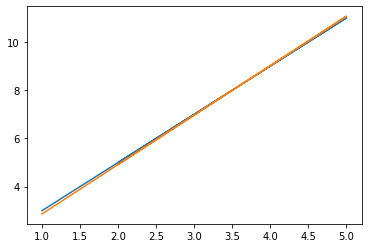

In [18]:
plt.plot(training_x, training_y)
plt.plot(training_x, hypothesis_theta(training_x, np.array([0.8131, 2.0512])))